### Importar Bibliotecas

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Carregar o Dataset e visualizar dados

In [2]:
df = pd.read_csv('titanic.csv')
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
print(df.describe())  

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Tratar Valores Ausentes

In [4]:
# checando se tem campos vazios
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Preencher ou remover valores nulos:
-Preencher a idade com a média.  
-Remover registros com Embarked nulo.

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)  

### Análise Visual
#### Distribuição da Idade

C:\Users\adair\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


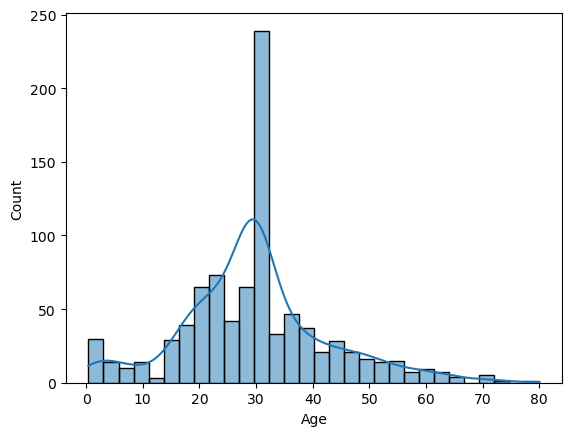

In [6]:
sns.histplot(df['Age'], bins=30, kde=True)  
plt.show()  


#### Sobrevivência por sexo:

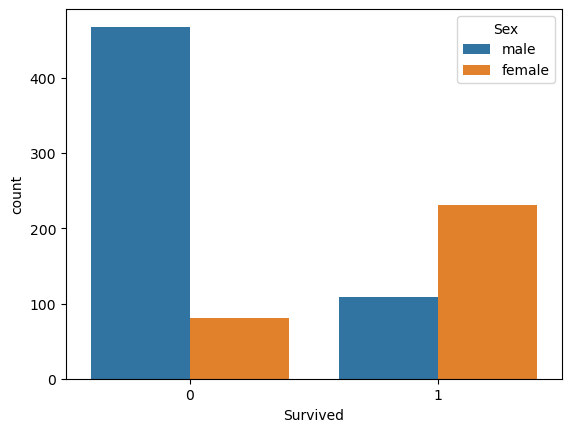

In [7]:
sns.countplot(x="Survived", hue="Sex", data=df)  
plt.show()  

#### Boxplot de Idade por Classe:

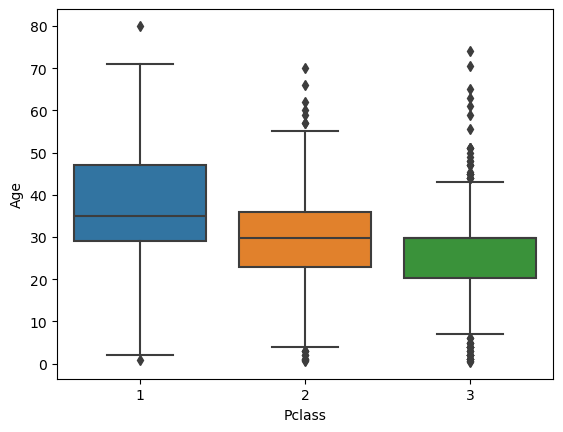

In [8]:
sns.boxplot(x="Pclass", y="Age", data=df)  
plt.show() 


### Preparação dos Dados para o Modelo
#### Converter variáveis categóricas em numéricas:

In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  


#### Selecionar as colunas relevantes:

In [10]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']  
X = df[features]  
y = df['Survived'] 


#### Dividir os Dados em Treino e Teste

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


### Treinar um Modelo de Árvore de Decisão

In [14]:
# Criar o modelo
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)

# Treinar o modelo nos dados de treino
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Fazer Previsões

In [15]:
y_pred = modelo.predict(X_test)
# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia:.2%}")

Acurácia do modelo: 82.02%
